#__Quoridor__

####Integrantes:
* Carhuancho Bazán Alessandro 
>U201913933
* Ingaroca Torres Andreluis
>U201913424
* Cruz Mamani Jack
>U201912400

#__Introducción__

Nuestro equipo de trabajo está en busca de una solución para el desarrollo del juego de Quoridor, basado en un enfoque de optimización de recursos, tanto en tiempo como espacio de memoria.

Este trabajo es fundamental para aplicar lo desarrollado en el curso de complejidad algorítmica. Como también, es base fundamental para una solución basada en Inteligencia Artificial.

Nuestra inspiración basa en analizar la complejidad y coste computacional de algoritmos para un eficiente desarrollo de software, proyectandonos en una visión a nuevas tecnologias, en lugar de una simple rutina de proceso.

##__Objetivos__

###__Del estudiante:__
   
*   __En Ingeniería de Software, el logro contribuye a alcanzar el: ABET – EAC - Student Outcome 4:__ La capacidad de reconocer responsabilidades éticas y profesionales en situaciones de ingeniería y hacer juicios informados, que deben considerar el impacto de las soluciones de ingeniería en contextos globales, económicos, ambientales y sociales.

*   __En Ciencias de la Computación, el logro contribuye a alcanzar el: ABET – CAC - Student Outcome 4:__ Reconocer las responsabilidades profesionales y tomar decisiones informadas sobre prácticas de computación basadas en principios legales y éticos.

###__Del trabajo:__
El presente trabajo tiene como objetivos:

*   Demostrar los conocimientos adquiridos dentro del curso y complementarlos a través de la investigación.

*   Analizar la complejidad de diferentes algoritmos y evaluar el consumo en espacio y en tiempo de dichos algoritmos.

*   Fortalecer las habilidades blandas, mejorando la comunicación y capacidad de trabajo en equipo de cada integrante del grupo.

##__Descripción del problema__

El Quoridor es un juego abstracto de estrategia donde pueden participar dos a cuatro personas, que sera desarrollado basado en los conocimientos adquiridos durante el ciclo en el curso mencionado en el lenguaje de programación de Python. En el presente trabajo se escalará el tamaño del tablero para que se pueda evaluar el coste computacional siguiendo las mismas reglas del juego original.

#__Estado del arte__

Los algoritmos que se usarán en el presente proyecto:
* Breadth First Search: Encuentra un árbol de expansión. Comienza de un vertice dado y explora todos los vertices vecinos antes de pasar a los siguientes vertice.
* Depth First Search: Encuentra un árbol de expansión en base a un vertice dado. Explora de forma recursiva cada nodo hasta llegar a un vertices que ya ha visitado o una hoja.
* Print Path: Devuelve el camino más corto entre dos vertices, si es que este existe.

#__Metodología__

Para representar la conexión entre los diferentes vertices, usaremos listas de adyacencia. Una lista de adyacencia ocupa mucho espacio en memoria en este caso debido a que

>$\Complejidad\Espacial$

>Lista de adyacencia ->
$O(V+E) = O(max(V, E))$

>Matriz de adyacencia ->
$O(V^2)$

>Para un tablero $N*N$, existen $V=N^2$ y $E=2N(N-1)$
>>Reemplazando
>>> $O(N^2+2N(N-1))<O((N^2)^2)$

>>> $O(N^2)<O(N^4)$

Para representar el tablero, usaremos nodos que representen los espacios donde el jugador puede estar, además,de aristas que representaran si dicho movimiento es válido.

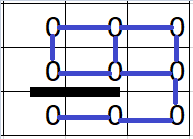

Otra forma de representar seria a través de una matriz que represente mediante simbolos, las barreras y los espacios donde el jugador puede colocarse.

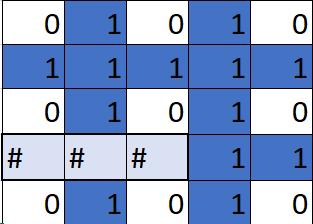

Sin embargo, para representar un tablero de $N*N$ se necesitaría una matriz real de $(2N-1)*(2N-1)$.

#Implementacion de los algoritmos

In [ ]:
#Implementacion de los algoritmos
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#Crear tablero
def CrearTableroR(n:int):
  G = nx.Graph()
  #Vertical
  for i in range(n-1):
    for j in range(n):
      G.add_edge((i, j), (i + 1, j))
      G.nodes[(i, j)]['id'] = (i, j) 
      G.nodes[(i + 1, j)]['id'] = (i + 1, j)
  #Horizontal
  for i in range(n):
    for j in range(n-1):
      G.add_edge((i, j), (i, j + 1))
      G.nodes[(i, j)]['id'] = (i, j) 
      G.nodes[(i, j + 1)]['id'] = (i, j + 1) 
  return G

In [ ]:
#DFS
def DFS_Visit(G, u):
  global tiempo
  tiempo = tiempo + 1
  u['inicio'] = tiempo
  u['color'] = 'Gris'
  for _, v_id in G.edges(u['id']):
    v = G.nodes[v_id]
    if v['color'] == 'Blanco':
      v['padre'] = u
      DFS_Visit(G, v)
  u['color'] = 'Negro'
  tiempo = tiempo + 1
  u['fin'] = tiempo

def DFS(G, s):
  global tiempo 
  tiempo = 0
  for _, u in G.nodes(data=True):
    u['color'] = 'Blanco'
    u['padre'] = None
  tiempo = 0
  DFS_Visit(G,s)
  for _, u in G.nodes(data=True):
    if u['color'] == 'Blanco':
      DFS_Visit(G,u)

In [ ]:
#Cola
from collections import deque
#BFS
def BFS(G, s):
  for _, u in G.nodes(data=True):
    u['color'] = 'Blanco'
    u['d'] = 10**10
    u['padre'] = None
  s['color'] = 'Gris'
  s['d'] = 0
  s['padre'] = None
  Q = deque()
  Q.append(s)
  while len(Q) != 0:
    u = Q.popleft()
    for _, v_id in G.edges(u['id']):
      v = G.nodes[v_id]
      if v['color'] == 'Blanco':
        v['color'] = 'Gris'
        v['d'] = u['d'] + 1
        v['padre'] = u
        Q.append(v)
    u['color'] = 'Negro'

In [ ]:
def mostrar_grafo(G):
  plt.figure(1, figsize=(10,10))
  nx.draw(G, with_labels=True, node_size=500, node_color="skyblue")
  plt.axis("off")

G = CrearTableroR(7)

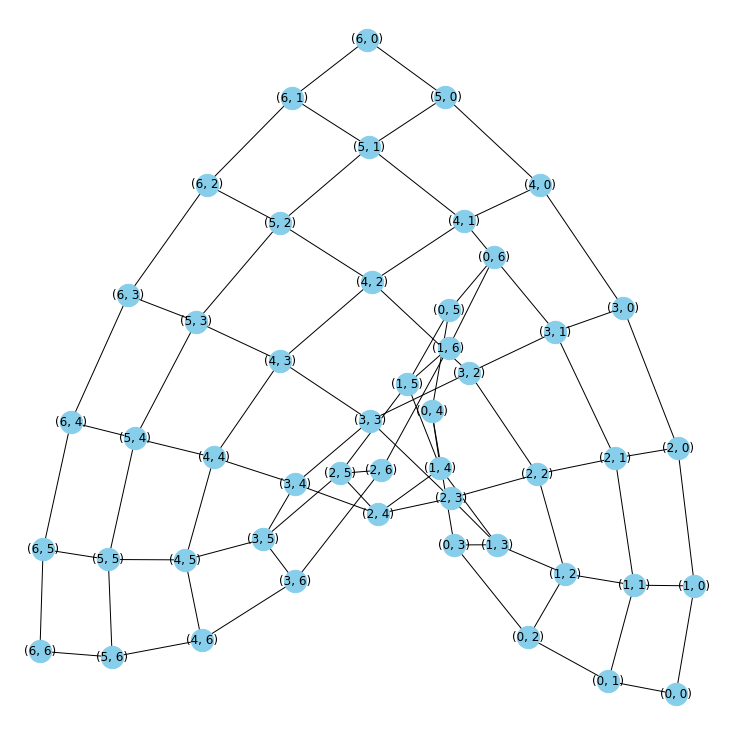

In [ ]:
mostrar_grafo(G)

In [ ]:
#Print Path
def PrintPath(G, s, v, camino):
  #v, s = x.copy(), y.copy()
  if v['id'] == s['id']:
    camino.appendleft(s['id'])
  elif v['padre'] == None:
    print('No existe camino de {} a {}'.format(s['id'],v['id']))
  else:
    PrintPath(G,s,v['padre'],camino)
    camino.appendleft(v['id'])

In [ ]:
#Prueba de funcionamiento de DFS y PrintPath
s = G.nodes[(3, 6)]
DFS(G, s)

lista = deque()
v = G.nodes[(3, 0)]
PrintPath(G, s, v, lista)
print(lista)

deque([(3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (6, 5), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5), (0, 6), (1, 6), (2, 6), (3, 6)])


In [ ]:
#Prueba de funcionamiento de BFS y PrintPath
s = G.nodes[(3, 0)]
v = G.nodes[(3, 6)]
BFS(G, s)

lista = deque()
PrintPath(G, s, v, lista)
print(lista) 


deque([(3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (3, 0)])


In [ ]:
def initConditions(N): #<- Dado un N (Matriz de N*N)
    #Calculamos las posiciones de P1 y P2
    win2pos = (N-1, N//2)
    jugador1 = G.nodes[win2pos]
    win2pos = G.nodes[win2pos]

    win1pos = (0, N//2)
    jugador2 = G.nodes[win1pos]
    win1pos = G.nodes[win1pos]
    #En base a dichos nodos, ejecutamos el BFS y obtenemos el camino a seguir de cada jugador
    BFS(G, jugador1)
    camino_j1 = deque()
    PrintPath(G, jugador1, win1pos, camino_j1) 

    BFS(G, jugador2)
    camino_j2 = deque()
    PrintPath(G, jugador2, win2pos, camino_j2)
    #Guardamos los caminos en una lista
    return [camino_j1, camino_j2]
    

In [ ]:
from tkinter import *
from tkinter import messagebox

ROJO = (255, 0, 0)
AZUL = (0, 0, 255)
COLOR1 = (100, 100, 100)
COLOR2 = (120, 120, 120)

In [ ]:
import pygame

N, camino_j = 9, []
G = CrearTableroR(N)
camino_j = initConditions(N)
#Verificamos el camino
print('Para el jugador 1: ', camino_j[0])
print('Para el jugador 2: ', camino_j[1])

pygame.init()
dimensiones = [900, 900]
pantalla = pygame.display.set_mode(dimensiones)
pygame.display.set_caption("TABLERO")

juego_terminado = False

reloj = pygame.time.Clock()
ancho = int(dimensiones[0] // N)
alto = int(dimensiones[1] // N)

def print_pos_player(i, j, num_j):
    colour = ()
    if num_j == 0:  colour = ROJO
    else:   colour = AZUL
    pygame.draw.rect(pantalla, colour, [j*ancho, i*alto, ancho, alto], 0)
    pygame.display.update(pygame.Rect(j*ancho, i*alto, ancho, alto))

def print_gray(i, j):
    pygame.draw.rect(pantalla, COLOR2, [j*ancho, i*alto, ancho, alto], 0)
    pygame.display.update(pygame.Rect(j*ancho, i*alto, ancho, alto))

def show_path(camino):
    # imprimir camino del jugador 1
    for e in camino[0]:
        print_pos_player(e[0], e[1], 0)
    # imprimir camino del jugador 2
    for e in camino[0]:
        print_pos_player(e[0], e[1], 1)   

def saltoPos(num_j):
    x, y = camino_j[num_j][0] #Posición actual
    for e_jugador in range(2): #range del nuúmero de jugadores
        if e_jugador != num_j:
            x_aux, y_aux = camino_j[e_jugador][0]
            if (x == x_aux and y == y_aux): #Nos preguntamos si en la posición actual estamos chocando con el contricante
                print('Move twice in a row')
                camino_j[num_j].popleft()
                x, y = camino_j[num_j][0]
    print_pos_player(x, y, num_j)

def sigPos(num_j):
    if len(camino_j[num_j]) > 1:
        x, y = camino_j[num_j][0]
        print_gray(x, y)
        camino_j[num_j].popleft()
        saltoPos(num_j)
    if len(camino_j[num_j]) == 1:
        Tk().wm_withdraw() #to hide the main window
        messagebox.showinfo(message="Jugador" + str(num_j + 1), title="Ganador")
        return True
    #pygame.display.flip()
    return False

##Pintar el tablero
pantalla.fill(COLOR2)
color = 0
for i in range(0, dimensiones[0], ancho):
    for j in range(0, dimensiones[1], alto):
        if color % 2 == 0:
            pygame.draw.rect(pantalla, COLOR1, [i, j, ancho, alto], 1)
        else:
            pygame.draw.rect(pantalla, COLOR2, [i, j, ancho, alto], 1)
        color += 1
    color += 1

#Bucle del juego
Turno = 0 #Comienza el jugador 1
#Imprimos las posiciones inciales de los jugadores
print_pos_player(camino_j[0][0][0], camino_j[0][0][1], 0)
print_pos_player(camino_j[1][0][0], camino_j[1][0][1], 1)
pygame.display.flip()
while juego_terminado == False:
    reloj.tick(5)
    juego_terminado = sigPos(Turno)
    if Turno == 0:  Turno = 1
    else: Turno = 0
    print('Para el jugador 1: ', camino_j[0])
    print('Para el jugador 2: ', camino_j[1])
pygame.quit()

Para el jugador 1:  deque([(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4)])
Para el jugador 2:  deque([(8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)])
Para el jugador 1:  deque([(1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4)])
Para el jugador 2:  deque([(8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)])
Para el jugador 1:  deque([(1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4)])
Para el jugador 2:  deque([(7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)])
Para el jugador 1:  deque([(2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4)])
Para el jugador 2:  deque([(7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)])
Para el jugador 1:  deque([(2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4)])
Para el jugador 2:  deque([(6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)])
Para el jugador 1:  deque([(3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4)])
Para

###Debido a la falta de una interfaz grafica, he colocado una imagen de como se vería si este código al ser compilado.

#####Nota: La imagen fue sacada en una previa compilación desde Visual Studio Code. 

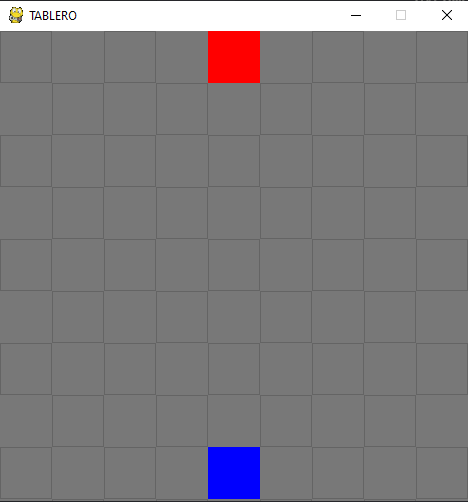

#Experimentos



In [ ]:
import time
def Exp(N):
    start = time.time()
    G = CrearTableroR(N)
    end = time.time()
    print(f"Tiempo creacion de un tablero de {N}x{N}:", (end - start))
    s = G.nodes[(0, N//2)]
    v = G.nodes[(N-1, N//2)]
    '''
    #start = time.time()
    #DFS(G, s)
    #end = time.time()    
    #print(f"Tiempo de ejecución de DFS en un tablero de {N}x{N}:", (end - start))
    #camino = deque()
    #start = time.time()
    #PrintPath(G, s, v, camino)
    #end = time.time()
    #print(f"Tiempo de ejecución de Print Path (usando DFS como referencia) en un tablero de {N}x{N}:", (end - start))
    '''
    start = time.time()
    BFS(G, s)
    end = time.time()
    print(f"Tiempo de ejecución de BFS en un tablero de {N}x{N}:", (end - start))
    camino = deque()
    start = time.time()
    PrintPath(G, s, v, camino)
    end = time.time()
    print(f"Tiempo de ejecución de Print Path (usando BFS como referencia) en un tablero de {N}x{N}:", (end - start))

#Resultados
En base a los experimentos realizados, se determinó que:
*   La función CrearTablero, presenta un eficiencia regular, dado que su compejidad es $O(n^2)$. 

*   Para valores pequeños, tal como en un tablero de 9x9, nuestra implementación de DFS es ligeramente más rapida que el BFS. Sin embargo, dicho DFS no soporta valores cercanos o superiores a un tablero de 79x79. Debido a ello se decició realizar el presente trabajo usando el algoritmo de BFS.

*   El algoritmo Print Path, pese a ser una implementación recursiva se desempeña de manera eficiente tanto para valores pequeños como grandes.

#Conclusiones

Se concluye del presente trabajo que el BFS es más eficiente que el DFS para este caso de estudio.
Además, se concluye que el juego de Quoridor puede ser representado medante grafos en el lenguaje de programación de Python.